# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Adição de Imagens

No vídeo abaixo, eu mostro uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

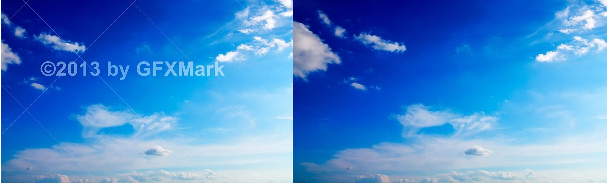

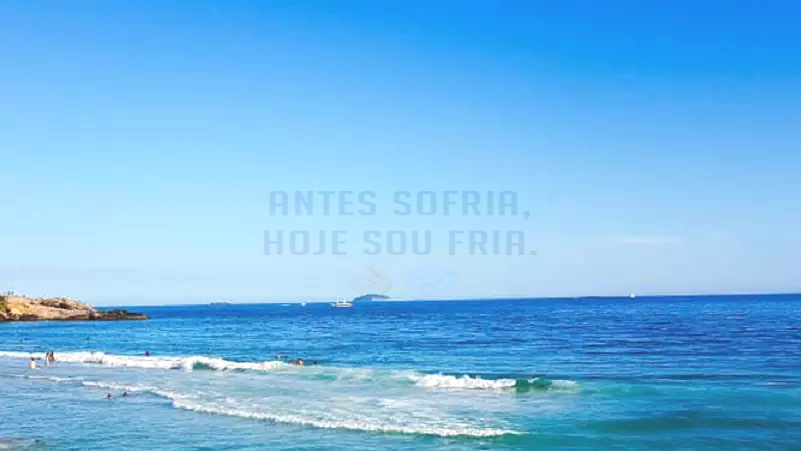

In [12]:
# Resolução:

from google.colab.patches import cv2_imshow
import cv2
import os

def unirImagens():
  ceu = cv2.imread("/content/ceu.png")
  frase = cv2.imread("/content/frase-motivacional.png")

  ceuH, ceuW, _ = ceu.shape
  frase = cv2.resize(frase, (ceuW, ceuH))

  sobreposicao = cv2.addWeighted(ceu, 1, frase, 0.1, 0)
  cv2.imwrite("ceu-frase.png", sobreposicao)
  cv2_imshow(sobreposicao)


def main():
  unirImagens()


if __name__ == "__main__":
  main()

#2. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [17]:
# Resolução

import numpy as np
import cv2

# Captura de video (0 = webcam)
cap = cv2.VideoCapture(0)

while(True):
  # captura os quadros e carrega na variável 'frame'
  _, frame = cap.read()

  # BGR to HSV (modelo matemático de representação de cores -> matiz/saturação/brilho)
  hsvImg = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

  # Objeto da cor azul -> Intervalo de Azul
  minBlue = np.array([70, 50, 0])
  maxBlue = np.array([140, 220, 255])

  # Analisa todos os pixels da imagem e marca todos dentro da intervalo passado acima
  mask = cv2.inRange(hsvImg, minBlue, maxBlue)

  # Obtem os contornos interligando pontos contínuos formando uma hierarquia
  # cv2.RETR_TREE retorna todos os contornos da imagem e constroi uma árvore hierárquica
  # cv2.CHAIN_APPROX_SIMPLE faz uma "economia" de pontos, armazenando só os pontos essenciais
  contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Se não existir o contorno, não tem necessidade de fazer tracking
  if(contours):
    # Pega a área do primeiro contorno
    maxArea = cv2.contourArea(contours[0])
    contourId = 0
    i = 0
    for cnt in contours:
      # Pega o contorno de maior área no momento
      if maxArea < cv2.contourArea(cnt):
        maxArea = cv2.contourArea(cnt)
        # Pega o id do maior contorno
        contourId = i
      i += 1

    # Retorna um retângulo que envolve o contorno de maior área
    x, y, w, h = cv2.boundingRect(contours[contourId])

    # Desenha um retângulo verde de espessura 3 diretamente na imagem
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

  cv2.imshow('frame', frame)
  cv2.imshow('mask', mask)

  # Se apertar alguma tecla e for 'q', sai do laço
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# Libera a captura
cap.release()
# Destroi todas as Janelas
cv2.destroyAllWindows()



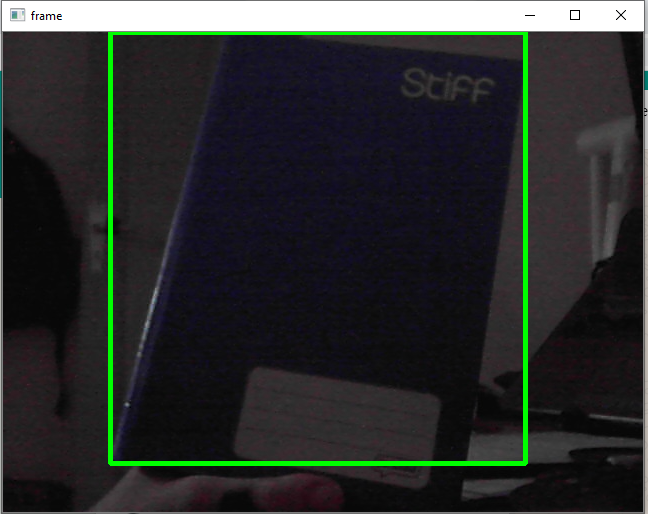

#3. Proposta do Trabalho Final

Acesse o SIGAA e no fórum "Proposta de Trabalho Final", você deve elaborar o conceito do seu trabalho final.

Essa proposta deverá constar de:

* Tema (Reconhecimento de Faces? Diagnóstico de Doenças por Imagem? Verificação de Qualidade em Linha de Montagem por Imagem? Astronomia e Machine Learning?)
* Problema a ser Resolvido (Se seu protótipo der certo, qual solução ele trará a sociedade? Para qual finalidade ele será usado?)
* Método a ser usado (Qual algoritmo você implementará para resolver o problema apontado?)

